# Falied 1D equalization analysis

### 4x1 chain no waist UT

Equalize: scale_factor is not a number. Set to None.


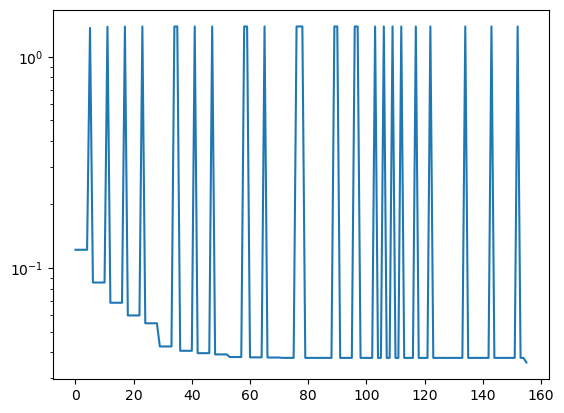

In [1]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 4
Ly = 1
d = 3
shape = 'square'
w = None
eqt = 'UT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(50, (930, 1250)),
                 lc=(1350, 1550),
                 ascatt=1770,
                 laser=770,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
fn = f'../output/Convergence analysis/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
report = rep.get_report(fn)
G.U, G.A = read_Hubbard(report)
c = rep.a(report, "Equalization_Log", "cost_func_value")

import matplotlib.pyplot as plt

plt.plot(c, '-')
plt.yscale('log')

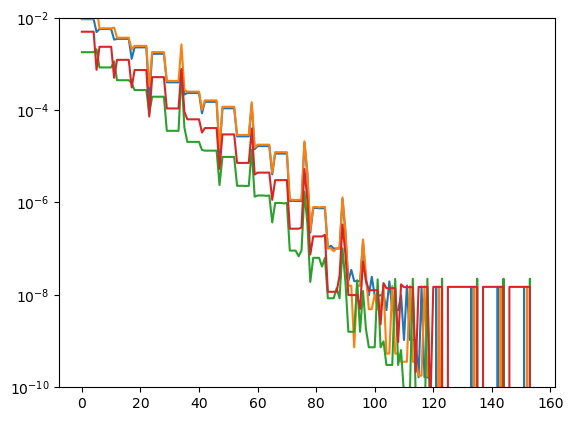

In [26]:
x = rep.a(report, "Equalization_Log", "x")

import matplotlib.pyplot as plt

plt.plot(abs(x - x[-1, :]), '-')
plt.ylim(1e-10, 1e-2)
plt.yscale('log')

In [2]:
tc = np.array([[-1.5,  0.], [-0.5,  0.]])
td = np.array([1, 1.])
G.symm_unfold(G.trap_centers, tc, graph=True)
G.symm_unfold(G.Voff, td)
G.update_lattice(G.trap_centers)
xlinks, ylinks, __, __ = G.xy_links(G.nn_tunneling(G.A))
G.sf = .5828346670502338
G.verbosity = 0
E, W, p = eigen_basis(G)
G.A, G.U, U = G.singleband_Hubbard(
    u=True, offset=True, output_unitary=True, eig_sol=(E, W, p))
Utarget = np.mean(G.U)
cv = np.sqrt(G.v_cost_func(G.A, None, G.sf))
ct = np.sqrt(G.t_cost_func(G.A, (xlinks, ylinks), (G.sf, None)))
cu = np.sqrt(G.u_cost_func(G.U, None, G.sf))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')
cvec = np.array((cu, ct, cv))**2
c = np.array([True, True, False]) @ cvec
fval = np.sqrt(c)
print(f'fval = {fval}')
print(f'E = {E}')
print(f'parity = {p}')


V = [ 0.68827245 -0.68827245 -0.68827245  0.68827245]
t = [0.62089856 0.50670688 0.62089856]
U = [1.01438188 0.92136758 0.92136758 1.01438188]
V_err = 1.180905133662741
t_err = 0.09235976291078385
U_err = 0.07979475875468899
fval = 0.12205543547771733
E = [array([-0.74260421, -0.72667058, -0.69900045, -0.69417615])]
parity = [array([[ 1,  1,  1],
       [-1,  1,  1],
       [ 1,  1,  1],
       [-1,  1,  1]])]


##### i=6 case

In [32]:
tc = np.array([[-1.50385879,  0.], [-0.49429018,  0.]])
td = np.array([0.9858494,  1.02651855])
G.symm_unfold(G.trap_centers, tc, graph=True)
G.symm_unfold(G.Voff, td)
G.update_lattice(G.trap_centers)
G.sf = .5828346670502338
G.verbosity = 0
E, W, p = eigen_basis(G)
G.A, G.U, U = G.singleband_Hubbard(
    u=True, offset=True, output_unitary=True, eig_sol=(E, W, p))
cv = np.sqrt(G.v_cost_func(G.A, None, G.sf))
ct = np.sqrt(G.t_cost_func(G.A, (xlinks, ylinks), (G.sf, None)))
cu = np.sqrt(G.u_cost_func(G.U, Utarget, G.sf))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')
cvec = np.array((cu, ct, cv))**2
c = np.array([True, True, False]) @ cvec
fval = np.sqrt(c)
print(f'fval = {fval}')
print(f'E = {E}')
print(f'parity = {p}')


V = [-1.02540877  0.88252506  1.16829247 -1.02540877]
t = [1.13358489 0.01704591 0.00668916]
U = [0.6292926  0.2759793  0.21070129 0.6292926 ]
V_err = 1.7678670666035503
t_err = 0.9682411096464071
U_err = 0.9710713987142322
fval = 1.3713024858907392
E = [array([-0.76434181, -0.74290476, -0.700865  , -0.68876154])]
parity = [array([[ 1,  1,  1],
       [-1,  1,  1],
       [ 1,  1,  1],
       [ 1,  1,  1]])]


In [2]:
tc = np.array([[-1.50385879,  0.], [-0.49429018,  0.]])
td = np.array([0.9858494,  1.02651855])
G.symm_unfold(G.trap_centers, tc, graph=True)
G.symm_unfold(G.Voff, td)
G.update_lattice(G.trap_centers)
G.sf = .5828346670502338
k = 10
p_list = sector(G)
E_sb = np.array([])
W_sb = []
p_sb = np.array([], dtype=int).reshape(0, dim)
for p in p_list:
    E_sb, W_sb, p_sb = solve_sector(p, G, k, E_sb, W_sb, p_sb)

# Sort everything by energy, only keetp lowest k states
idx = np.argsort(E_sb)[:k]
E_sb = E_sb[idx]
W_sb = [W_sb[i] for i in idx]
p_sb = p_sb[idx, :]
print(E_sb)
print(p_sb)

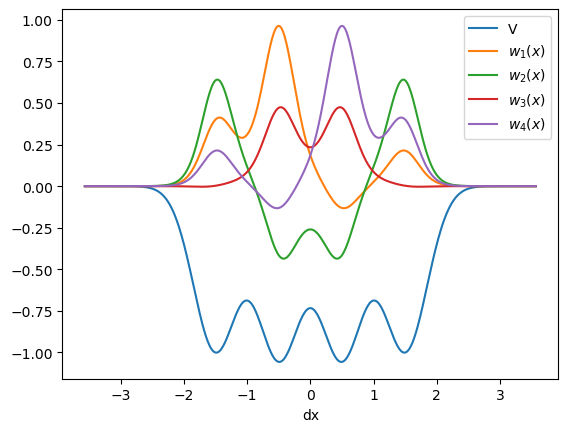

In [33]:
import matplotlib.pyplot as plt
from tools.fix_phase import fix_phase

x = np.linspace(-G.R0[0], G.R0[0], 500)
y = np.array([0])
z = np.array([0])
X = np.meshgrid(x, y, z, indexing='ij')
v = G.Vfun(*X)
plt.plot(x / G.lc[0], v[:, 0, 0], label='V')
plt.plot(x / G.lc[0],
         fix_phase(wannier_func(G, W[0], U, p[0],
                                [x, y, z])[:, 0, 0, :]),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(G.Nsite)))
plt.xlabel('dx')
plt.legend()


It hits a point that only 1 state is coming from $p_x=-1$ sector.

In [36]:
tc = tc
td[1] += 1e-5
G.symm_unfold(G.trap_centers, tc, graph=True)
G.symm_unfold(G.Voff, td)
G.update_lattice(G.trap_centers)
G.sf = .582834667050257
G.verbosity = 0
E, W, p = eigen_basis(G)
G.singleband_Hubbard(u=True, offset=True)
cv = np.sqrt(G.v_cost_func(G.A, None, G.sf))
ct = np.sqrt(G.t_cost_func(G.A, (xlinks, ylinks), (G.sf, None)))
cu = np.sqrt(G.u_cost_func(G.U, Utarget, G.sf))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')
cvec = np.array((cu, ct, cv))**2
c = np.array([True, True, False]) @ cvec
fval = np.sqrt(c)
print(f'fval = {fval}')
print(f'E = {E}')
print(f'parity = {p}')

V = [-1.0255336   1.16822363  0.88284358 -1.0255336 ]
t = [0.00669718 0.01706812 1.13363121]
U = [0.62934728 0.21070519 0.27599344 0.62934728]
V_err = 1.7680572003385462
t_err = 0.9682495491362398
U_err = 0.9710336920556365
fval = 1.371281743665295
E = [array([-0.76434988, -0.74291264, -0.70087245, -0.68876232])]
parity = [array([[ 1,  1,  1],
       [-1,  1,  1],
       [ 1,  1,  1],
       [ 1,  1,  1]])]


When I perturb it a little bit, it remains there with quite singular low energy space.

##### i=7

Since the step from i=6 to i=7 is big, so the qualitative behavior is different.

In [34]:
tc = np.array([[-1.50095374,  0.], [-0.49737936,  0.]])
td = np.array([0.99638859, 1.00353685])
G.symm_unfold(G.trap_centers, tc, graph=True)
G.symm_unfold(G.Voff, td)
G.update_lattice(G.trap_centers)
G.sf = .5828346670502338
G.verbosity = 0
E, W, p = eigen_basis(G)
G.singleband_Hubbard(u=True, offset=True)
cv = np.sqrt(G.v_cost_func(G.A, None, G.sf))
ct = np.sqrt(G.t_cost_func(G.A, (xlinks, ylinks), (G.sf, None)))
cu = np.sqrt(G.u_cost_func(G.U, Utarget, G.sf))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')
cvec = np.array((cu, ct, cv))**2
c = np.array([True, True, False]) @ cvec
fval = np.sqrt(c)
print(f'fval = {fval}')
print(f'E = {E}')
print(f'parity = {p}')

V = [ 0.8560701 -0.8560701 -0.8560701  0.8560701]
t = [0.60291215 0.53917335 0.60291215]
U = [1.0065728  0.92728911 0.92728911 1.0065728 ]
V_err = 1.4688043533460584
t_err = 0.051591785018174414
U_err = 0.06803486135667737
fval = 0.0853841591935169
E = [array([-0.74577918, -0.7277367 , -0.69608362, -0.69205124])]
parity = [array([[ 1,  1,  1],
       [-1,  1,  1],
       [ 1,  1,  1],
       [-1,  1,  1]])]


#### i=153 case

In [3]:
tc = np.array([[-1.50179138,  0.], [-0.49503487,  0.]])
td = np.array([0.99072223, 1.0094233])
G.symm_unfold(G.trap_centers, tc, graph=True)
G.symm_unfold(G.Voff, td)
G.update_lattice(G.trap_centers)
G.sf = .5828346670502338
G.verbosity = 0
E, W, p = eigen_basis(G)
G.singleband_Hubbard(u=True, offset=True)
cv = np.sqrt(G.v_cost_func(G.A, None, G.sf))
ct = np.sqrt(G.t_cost_func(G.A, (xlinks, ylinks), (G.sf, None)))
cu = np.sqrt(G.u_cost_func(G.U, Utarget, G.sf))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')
cvec = np.array((cu, ct, cv))**2
c = np.array([True, True, False]) @ cvec
fval = np.sqrt(c)
print(f'fval = {fval}')
print(f'E = {E}')
print(f'parity = {p}')

V = [ 1.10366762 -1.10366762 -1.10366762  1.10366762]
t = [0.59273928 0.56979128 0.59273928]
U = [0.97939474 0.94379658 0.94379658 0.97939474]
V_err = 1.8936204067721418
t_err = 0.01895972173701471
U_err = 0.032383384166819434
fval = 0.03752538631967484
E = [array([-0.75090876, -0.73079351, -0.69177621, -0.6885275 ])]
parity = [array([[ 1,  1,  1],
       [-1,  1,  1],
       [ 1,  1,  1],
       [-1,  1,  1]])]


In [8]:
tc = np.array([[-1.50179138,  0.], [-0.49503487,  0.]])
td = np.array([0.99072223, 1.0094233])
G.symm_unfold(G.trap_centers, tc, graph=True)
G.symm_unfold(G.Voff, td)
G.update_lattice(G.trap_centers)
G.sf = .5828346670502338
k = 10
p_list = sector(G)
E_sb = np.array([])
W_sb = []
p_sb = np.array([], dtype=int).reshape(0, dim)
for p in p_list:
    E_sb, W_sb, p_sb = solve_sector(p, G, k, E_sb, W_sb, p_sb)

# Sort everything by energy, only keetp lowest k states
idx = np.argsort(E_sb)[:k]
E_sb = E_sb[idx]
W_sb = [W_sb[i] for i in idx]
p_sb = p_sb[idx, :]
print(E_sb)
print(p_sb)

[-0.75090876 -0.73079351 -0.69177621 -0.6885275  -0.6885275  -0.6636109
 -0.63686971 -0.6202777  -0.61286952 -0.60773256]
[[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [-1  1  1]
 [-1  1  1]]


The 4-th and 5-th sates are degenerate.

i=154

In [9]:
tc = np.array([[-1.5017914,  0.], [-0.49503487,  0.]])
td = np.array([0.99072223, 1.00942329])
G.symm_unfold(G.trap_centers, tc, graph=True)
G.symm_unfold(G.Voff, td)
G.update_lattice(G.trap_centers)
G.sf = .5828346670502338
G.verbosity = 0
E, W, p = eigen_basis(G)
G.singleband_Hubbard(u=True, offset=True)
cv = np.sqrt(G.v_cost_func(G.A, None, G.sf))
ct = np.sqrt(G.t_cost_func(G.A, (xlinks, ylinks), (G.sf, None)))
cu = np.sqrt(G.u_cost_func(G.U, Utarget, G.sf))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')
cvec = np.array((cu, ct, cv))**2
c = np.array([True, True, False]) @ cvec
fval = np.sqrt(c)
print(f'fval = {fval}')
print(f'E = {E}')
print(f'parity = {p}')

V = [ 1.10366748 -1.10366748 -1.10366748  1.10366748]
t = [0.59273917 0.56979131 0.59273917]
U = [0.97939483 0.94379656 0.94379656 0.97939483]
V_err = 1.893620168991687
t_err = 0.01895958223078681
U_err = 0.03238346422004429
fval = 0.037525384918170465
E = [array([-0.75090875, -0.73079349, -0.6917762 , -0.68852749])]
parity = [array([[ 1,  1,  1],
       [-1,  1,  1],
       [ 1,  1,  1],
       [-1,  1,  1]])]


In [10]:
tc = np.array([[-1.5017914,  0.], [-0.49503487,  0.]])
td = np.array([0.99072223, 1.00942329])
G.symm_unfold(G.trap_centers, tc, graph=True)
G.symm_unfold(G.Voff, td)
G.update_lattice(G.trap_centers)
G.sf = .5828346670502338
k = 10
p_list = sector(G)
E_sb = np.array([])
W_sb = []
p_sb = np.array([], dtype=int).reshape(0, dim)
for p in p_list:
    E_sb, W_sb, p_sb = solve_sector(p, G, k, E_sb, W_sb, p_sb)

# Sort everything by energy, only keetp lowest k states
idx = np.argsort(E_sb)[:k]
E_sb = E_sb[idx]
W_sb = [W_sb[i] for i in idx]
p_sb = p_sb[idx, :]
print(E_sb)
print(p_sb)

[-0.75090875 -0.73079349 -0.6917762  -0.68852749 -0.68852748 -0.66361089
 -0.6368697  -0.62027769 -0.61286951 -0.60773255]
[[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [-1  1  1]
 [-1  1  1]]


### 3x1 chain no waist UT

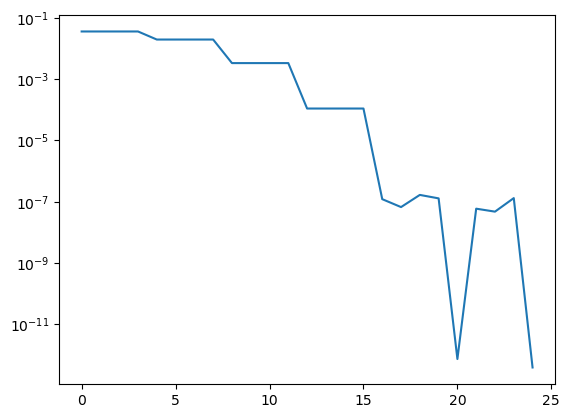

In [10]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
Ly = 1
d = 3
shape = 'square'
w = None
eqt = 'UT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(50, (930, 1250)),
                 lc=(1350, 1550),
                 ascatt=1770,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
fn = f'../output/Convergence analysis/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
report = rep.get_report(fn)
G.U, G.A = read_Hubbard(report)
c = rep.a(report, "Equalization_Log", "cost_func_value")

import matplotlib.pyplot as plt

plt.plot(c, '-')
plt.yscale('log')